<a href="https://colab.research.google.com/github/kaustav1996/utility_data_analysis/blob/master/commercial_hourly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#PRE CONFIGURE RUNTIME
# !pip install --upgrade Cython
# !pip install --upgrade git+https://github.com/statsmodels/statsmodels
# !pip install pmdarima


Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (0.29.10)
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-qhq9q9t5
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-qhq9q9t5
  Stored in directory: /tmp/pip-ephem-wheel-cache-kex5f23_/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.10.0rc2+22.g45a58b5a4
    Uninstalling statsmodels-0.10.0rc2+22.g45a58b5a4:
      Successfully uninstalled statsmodels-0.10.0rc2+22.g45a58b5a4


In [2]:
import os

model_errors=dict()

repo_url = 'https://github.com/kaustav1996/utility_data_analysis'

%cd /content

repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))

!git clone {repo_url}
%cd {repo_dir_path}
!git pull

%ls

csv_file= os.path.abspath(os.path.join(repo_dir_path,'interval_data_commercial.csv'))

/content
fatal: destination path 'utility_data_analysis' already exists and is not an empty directory.
/content/utility_data_analysis
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/kaustav1996/utility_data_analysis
   df182cd..eb9be9a  master     -> origin/master
Updating df182cd..eb9be9a
Fast-forward
 analysis_on_csv_data_daily_basis.ipynb |   917 ++
 interval_data_commercial.csv           | 17897 +++++++++++++++++++++++++++++++
 2 files changed, 18814 insertions(+)
 create mode 100644 analysis_on_csv_data_daily_basis.ipynb
 create mode 100644 interval_data_commercial.csv
analysis_on_csv_data_daily_basis.ipynb  interval_data_commercial.csv  README.md
analysis_on_csv_data.ipynb              interval_data.csv
analysis_on_csv_data_monthly.ipynb      LICENSE


In [31]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
#Importing data
df = pd.read_csv(csv_file)
df=df.fillna(df.mean())
#Printing head
df.head()


,TIME,KW
0,8/29/2018 0:15,0.0
1,8/29/2018 0:30,0.0
2,8/29/2018 0:45,0.0
3,8/29/2018 1:00,0.0
4,8/29/2018 1:15,0.0


In [32]:
df.tail()

,TIME,KW
17891,6/7/2019 3:00,6.25
17892,6/7/2019 3:15,6.25
17893,6/7/2019 3:30,6.25
17894,6/7/2019 3:45,6.25
17895,6/7/2019 4:00,6.25


In [40]:
testtest=df[17751:]
testtest.head()

,TIME,KW
17751,6/5/2019 0:00,2.0
17752,6/5/2019 0:15,5.0
17753,6/5/2019 0:30,5.0
17754,6/5/2019 0:45,5.0
17755,6/5/2019 1:00,5.0


In [41]:
train=df[16967:17751]
test=test=df[17751:]

df.Timestamp = pd.to_datetime(df['TIME'],format='%m/%d/%Y %H:%M') 
df.index = df.Timestamp 
df = df.resample('60T').mean()
train.Timestamp = pd.to_datetime(train['TIME'],format='%m/%d/%Y %H:%M') 
train.index = train.Timestamp 
train = train.resample('60T').mean()
test.Timestamp = pd.to_datetime(test['TIME'],format='%m/%d/%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('60T').mean()

# train['TIME']=train.index

print(train)

                            KW
TIME                          
2019-05-20 00:00:00   0.027500
2019-05-20 01:00:00   0.000000
2019-05-20 02:00:00   0.027500
2019-05-20 03:00:00   0.000000
2019-05-20 04:00:00   0.000000
2019-05-20 05:00:00   0.000000
2019-05-20 06:00:00   0.000000
2019-05-20 07:00:00   0.000000
2019-05-20 08:00:00   0.000000
2019-05-20 09:00:00        NaN
2019-05-20 10:00:00   0.266667
2019-05-20 11:00:00   1.865000
2019-05-20 12:00:00   1.005000
2019-05-20 13:00:00   1.550000
2019-05-20 14:00:00   0.715000
2019-05-20 15:00:00   0.630000
2019-05-20 16:00:00   0.832500
2019-05-20 17:00:00   1.577500
2019-05-20 18:00:00   2.900000
2019-05-20 19:00:00  11.165000
2019-05-20 20:00:00   9.990000
2019-05-20 21:00:00        NaN
2019-05-20 22:00:00        NaN
2019-05-20 23:00:00        NaN
2019-05-21 00:00:00   3.310000
2019-05-21 01:00:00   0.000000
2019-05-21 02:00:00   0.145000
2019-05-21 03:00:00   0.000000
2019-05-21 04:00:00   0.000000
2019-05-21 05:00:00   0.000000
...     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


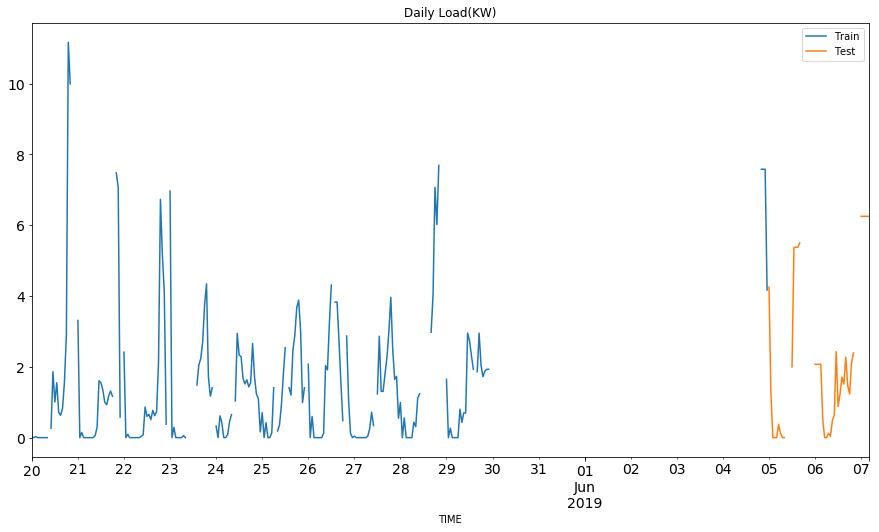

In [42]:
train.KW.plot(figsize=(15,8), title= 'Daily Load(KW)',label='Train' ,fontsize=14)
test.KW.plot(figsize=(15,8), title= 'Daily Load(KW)', label='Test', fontsize=14)
plt.legend(loc='best')
plt.show()


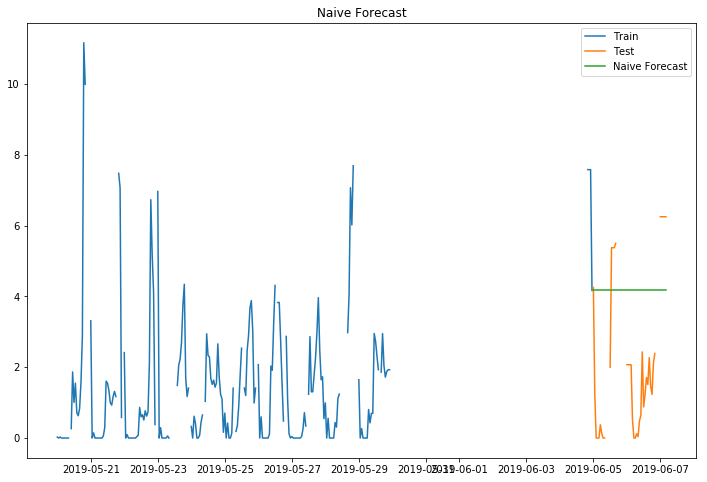

In [43]:
dd= np.asarray(train.KW)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['KW'], label='Train')
plt.plot(test.index,test['KW'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test = test.fillna(test.mean())
rms = sqrt(mean_squared_error(test.KW, y_hat.naive))
print(rms)

model_errors['Naive']=rms

2.7343653068291798


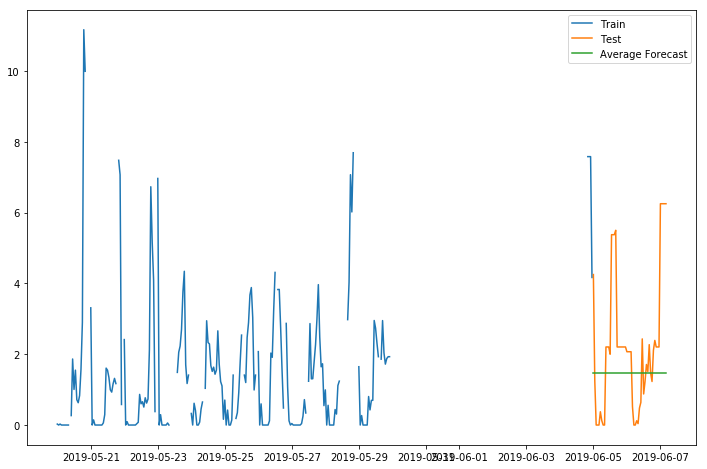

In [45]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['KW'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [46]:
rms = sqrt(mean_squared_error(test.KW, y_hat_avg.avg_forecast))
print(rms)

model_errors['Average']=rms

2.0392618344467937


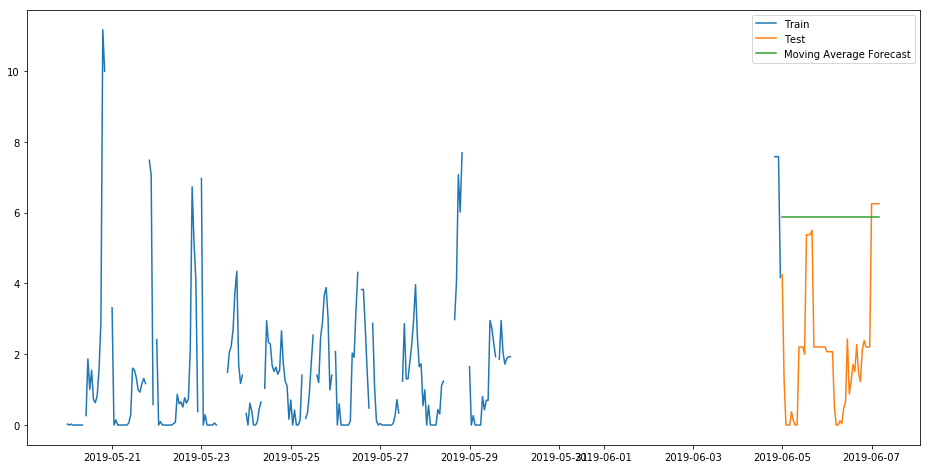

In [47]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['KW'].rolling(2).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [48]:
test = test.fillna(test.mean())
rms = sqrt(mean_squared_error(test.KW, y_hat_avg.moving_avg_forecast))
print(rms)

model_errors['Moving Average']=rms

4.1335642768912


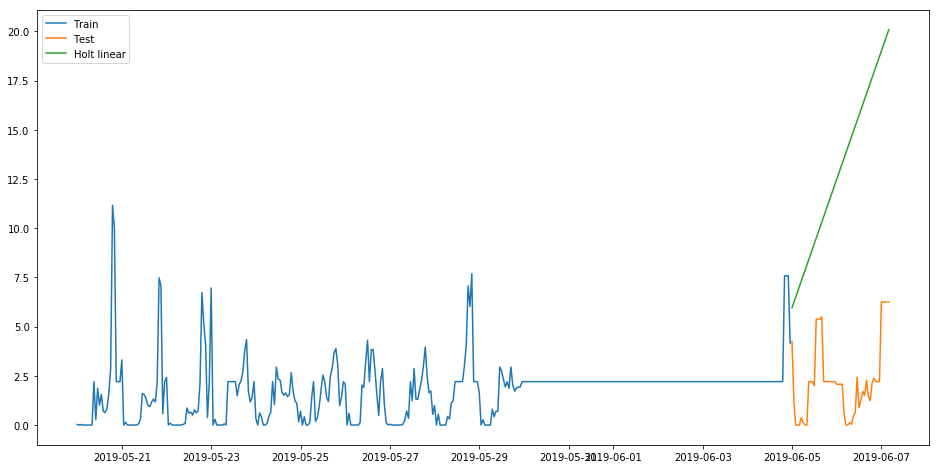

In [49]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

train = train.fillna(test.mean())

y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['KW'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt linear')
plt.legend(loc='best')
plt.show()


In [50]:
rms = sqrt(mean_squared_error(test.KW, y_hat_avg.Holt_linear))
print(rms)

model_errors['Holt Linear']=rms


11.525490256440289


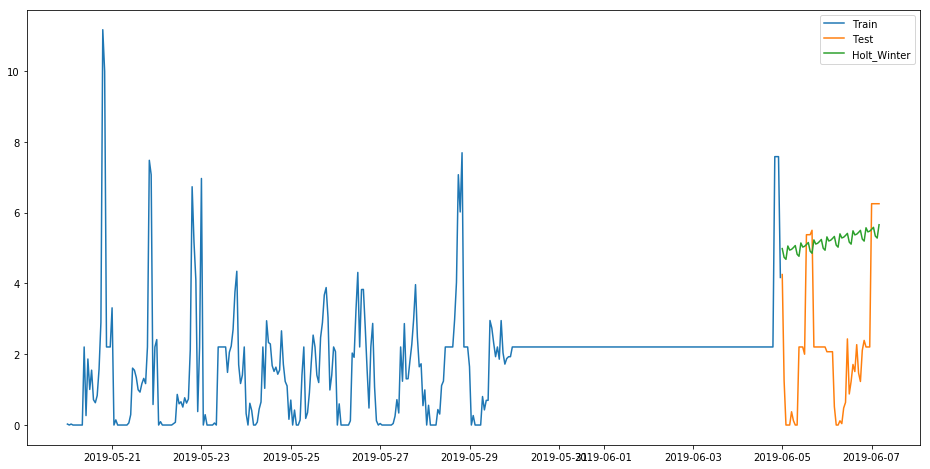

In [51]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['KW']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [52]:
rms = sqrt(mean_squared_error(test.KW, y_hat_avg.Holt_Winter))
print(rms)

model_errors['Holt Winter']=rms


3.5159063946569775


In [73]:
import pmdarima as pm
import datetime

arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      seasonal=True,m=24)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 24); AIC=1133.090, BIC=1164.674, Fit time=3.745 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 24); AIC=1230.822, BIC=1238.718, Fit time=0.015 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 24); AIC=1214.344, BIC=1230.136, Fit time=0.448 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 24); AIC=1211.469, BIC=1227.262, Fit time=0.612 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 1, 24); AIC=1154.001, BIC=1181.637, Fit time=4.464 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 1, 24); AIC=1120.233, BIC=1155.765, Fit time=23.766 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 0, 24); AIC=1122.726, BIC=1154.311, Fit time=22.420 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 2, 24); AIC=1139.995, BIC=1179.476, Fit time=24.992 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 0, 24); AIC=1145.007, BIC=1172.643, Fit time=5.626 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 2) seasonal_order=(2, 0, 1, 24); AIC=1125.537, BIC=1157.121, Fit time=19.728 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 1, 2) seasonal_order=(2, 0, 1, 24); AIC=1123.147, BIC=1162.627, Fit time=26.616 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 0, 1, 24); AIC=1129.020, BIC=1160.605, Fit time=21.068 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 3) seasonal_order=(2, 0, 1, 24); AIC=1128.321, BIC=1167.801, Fit time=25.688 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 24); AIC=1120.679, BIC=1148.315, Fit time=17.430 seconds


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 1, 3) seasonal_order=(2, 0, 1, 24); AIC=1124.145, BIC=1167.573, Fit time=28.999 seconds
Total fit time: 225.642 seconds


1000


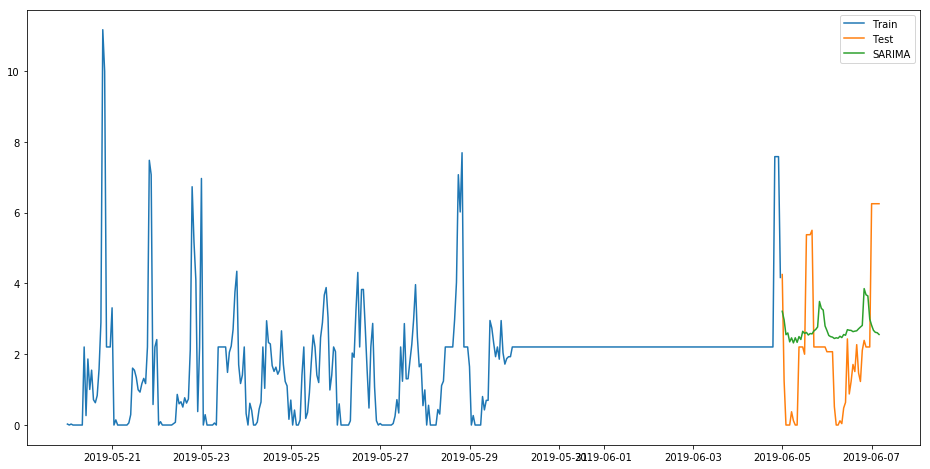

In [74]:
predicted_val=arima.predict(n_periods=1000)
predicted_df = test.copy()

print(len(predicted_val))

for i in range(len(predicted_df)):
    predicted_df['KW'][i]=predicted_val[i]


plt.figure(figsize=(16,8))
plt.plot( train['KW'], label='Train')
plt.plot(test['KW'], label='Test')
plt.plot(predicted_df, label='SARIMA')
plt.legend(loc='best')
plt.show()

In [75]:
rms = sqrt(mean_squared_error(test.KW, predicted_df.KW))
print(rms)

model_errors['SARIMA']=rms

1.9485832008208892


In [76]:
for index in model_errors:
    print(index+' : '+str(model_errors[index]))

Naive : 2.7343653068291798
Average : 2.0392618344467937
Moving Average : 4.1335642768912
Holt Linear : 11.525490256440289
SARIMA : 1.9485832008208892
Holt Winter : 3.5159063946569775
